<span>
<b>Python version:</b>  >=3.7<br/>
<b>Networkx version:</b>  >=2.3<br/>
<b>Last update:</b> 15/02/2021
</span>

<a id='top'></a>
# *Chapter 2: Basic Measures*

``Networkx`` es una biblioteca de Python diseñada para brindar soporte para el análisis de redes complejas.

En este cuaderno se presentan algunas de las características principales de la biblioteca y una descripción general de sus funcionalidades.

**Nota:** este cuaderno no es 100 % exhaustivo, solo analiza los aspectos básicos que necesita para comenzar. <br/> Hay disponible una documentación completa (y un tutorial) en el proyecto [website](https://networkx.github.io/documentation/latest/)

## Installation
To install ``networkx`` use the following command:

    pip install networkx

## Importando las librerias
Como primer paso, simplemente importe la biblioteca ``networkx``.

In [1]:
import networkx as nx
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
warnings.filterwarnings('ignore')

En nuestro ejemplo no sólo analizaremos gráficos sino que también los visualizaremos: por este motivo debemos importar también ``matplotlib``.

In [2]:
%matplotlib inline

## Diseñar nuestro primer grafo

``networkx`` proporciona soporte para varios modelos de grafos.

Entre ellos
- grafos no dirigidos, disponibles a través de la clase ``Graph``.
- grafos dirigidos, disponibles a través de la clase ``DiGraph``.

En este breve tutorial nos centraremos únicamente en los grafos no dirigidos.

Podemos construir un grafo añadiendo nodos y aristas de la siguiente manera:

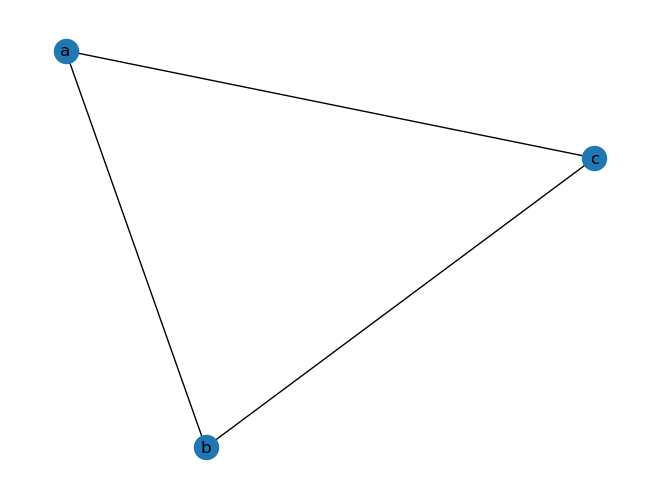

In [3]:
g = nx.Graph()

g.add_node("a")
g.add_edge("a", "b")
g.add_edge("a", "c")
g.add_edge("b", "c")

nx.draw(g ,with_labels=True)

Los nodos y las aristas también se pueden eliminar fácilmente

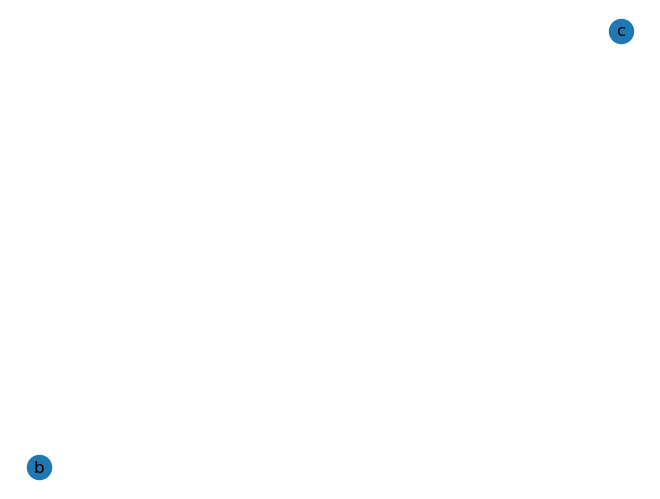

In [4]:
g.remove_node("a")
g.remove_edge("b", "c")

#re-draw the graph
nx.draw(g, with_labels=True)

## Lectura de un grafo desde un fichero

> Añadir blockquote


``networkx`` soporta de forma nativa varios formatos de ficheros de grafos.

Entre ellos uno de los más usados en repositorios online es el *edgelist*.

Una lista de aristas es un archivo de texto (generalmente guardado como .csv) en el que cada línea identifica una arista. <br/>
Por ejemplo, el triángulo definido anteriormente se puede describir como:

a,b
b,c
c,a

Para leer el archivo edgelist basta con escribir

In [5]:
g = nx.read_edgelist("network.csv", delimiter=",", nodetype=int)

De forma similar, se puede escribir un gráfico en un archivo utilizando ``nx.write_edgelist(g, filename)``.

Para todos los métodos de E/S consulte la [documentación oficial](https://networkx.github.io/documentation/latest/reference/readwrite/index.html)

## Acceso a nodos y aristas
Dado un objeto ``Graph`` ¿es posible iterar sobre sus nodos con un simple bucle ``for``?

In [ ]:
for n in g.nodes():
    # do something
    print(n)

Siguiendo un razonamiento similar, ¿es también posible hacer un bucle sobre el conjunto de aristas

In [ ]:
for e in g.edges():
    # do something
    print(e)
g

Todas las entidades del grafo pueden utilizarse para almacenar atributos adicionales (pesos, etiquetas...).

Para más detalles, consulte la [documentación oficial](https://networkx.github.io/documentation/latest/tutorial.html#adding-attributes-to-graphs-nodes-and-edges)

In [8]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
DG.add_weighted_edges_from([(1, 3, 21)])


In [9]:
DG.out_degree(1, weight='weight')

21.5

In [10]:
DG.in_degree(1, weight="weight")

0.75

In [11]:
list(DG.successors(1))

[2, 3]

In [12]:
list(DG.neighbors(1))

[2, 3]

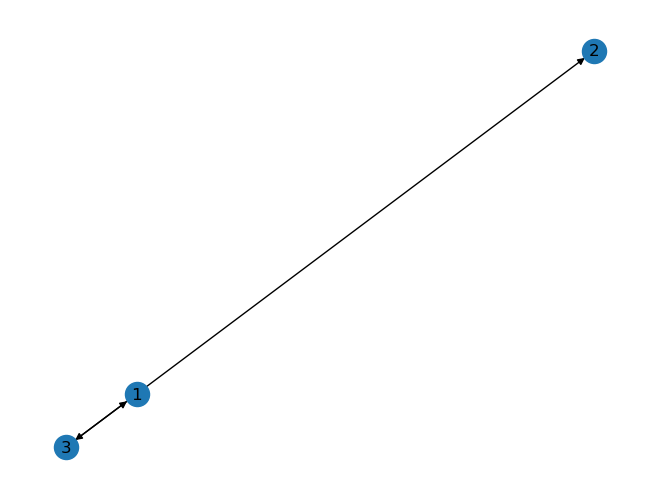

In [13]:
nx.draw(DG, with_labels=True)

In [14]:
H = nx.Graph(DG)

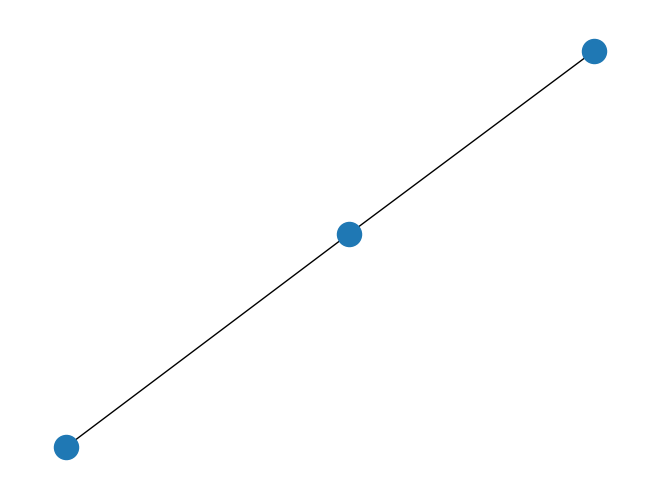

In [15]:
nx.draw(H)

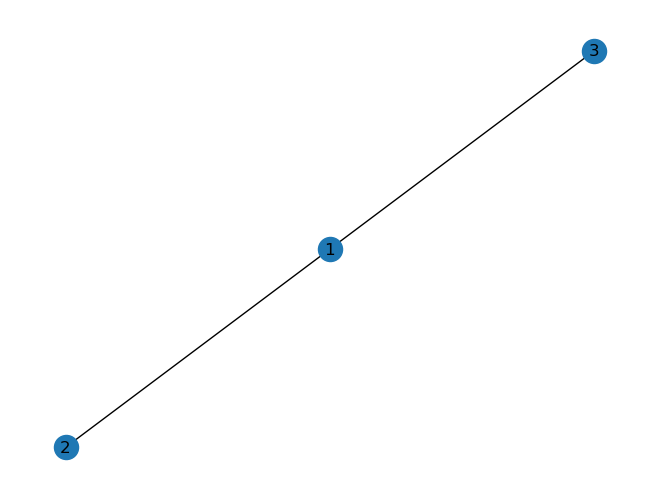

In [16]:
# Crear dos grafos
G = nx.Graph()
H = nx.Graph()

# Añadir nodos y aristas a G
G.add_edges_from([(1,3)])
G.add_edges_from([(1,2)])
nx.draw(G, with_labels=True)


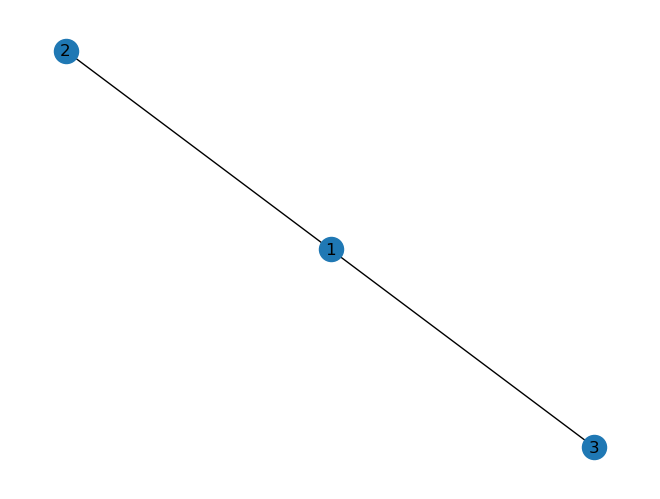

In [17]:
# Añadir nodos y aristas a H
H.add_edges_from([(1, 2)])
H.add_edges_from([(1, 3)])
nx.draw(H, with_labels=True)

Nodos: [(1, 1), (1, 2), (1, 3), (3, 1), (3, 2), (3, 3), (2, 1), (2, 2), (2, 3)]
Aristas: [((1, 1), (3, 1)), ((1, 1), (2, 1)), ((1, 1), (1, 2)), ((1, 1), (1, 3)), ((1, 2), (3, 2)), ((1, 2), (2, 2)), ((1, 3), (3, 3)), ((1, 3), (2, 3)), ((3, 1), (3, 2)), ((3, 1), (3, 3)), ((2, 1), (2, 2)), ((2, 1), (2, 3))]


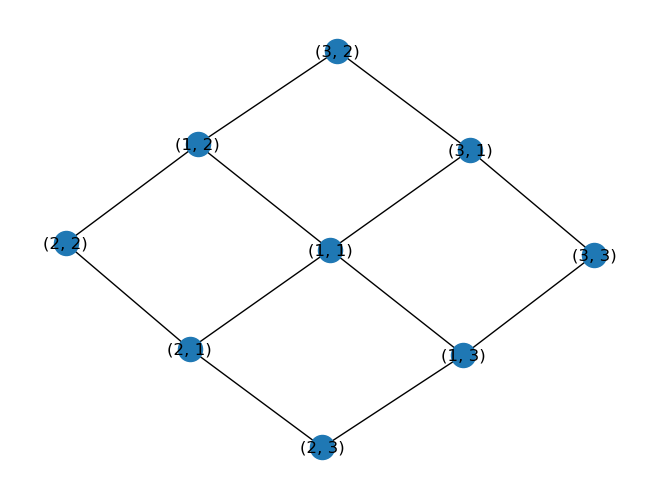

In [18]:
# Calcular el producto cartesiano
cartesian_product = nx.cartesian_product(G, H)

# Imprimir los nodos y aristas del producto cartesiano
print("Nodos:", cartesian_product.nodes())
print("Aristas:", cartesian_product.edges())
nx.draw(cartesian_product, with_labels=True)

## Estadísticas base de la red
``networkx`` permite manipular tanto nodos como aristas, contarlos y extraer características globales relevantes.

In [19]:
g.number_of_nodes()

2566

In [20]:
g.number_of_edges()

8593

In [21]:
g.is_directed()

False

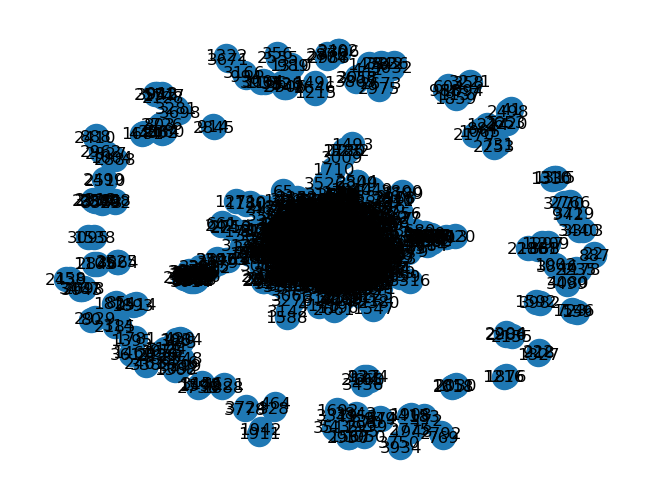

In [39]:
nx.draw(g, with_labels=True)

## Grados y distribución de grados
El grado del nodo puede obtenerse fácilmente de la siguiente manera:

In [22]:
g.degree(1) # degree for node 1

24

Del mismo modo, el grado medio puede calcularse con

In [23]:
sum(dict(g.degree()).values())/float(len(g))

6.697583787996883

Una forma sencilla de calcular y visualizar la distribución de grados es la siguiente

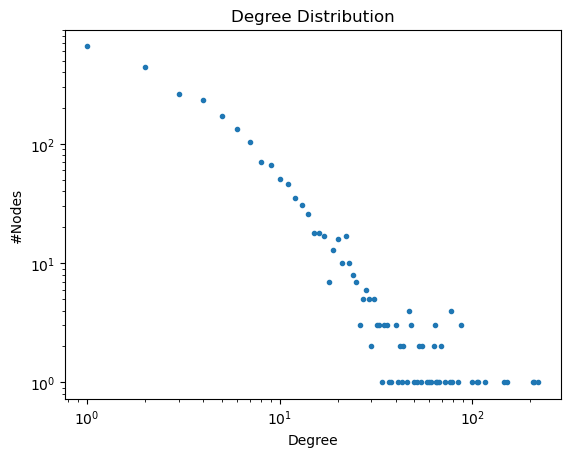

In [24]:
hist = nx.degree_histogram(g)

plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()

Una más completa en cambio es...

Calculating best minimal value for power law fit


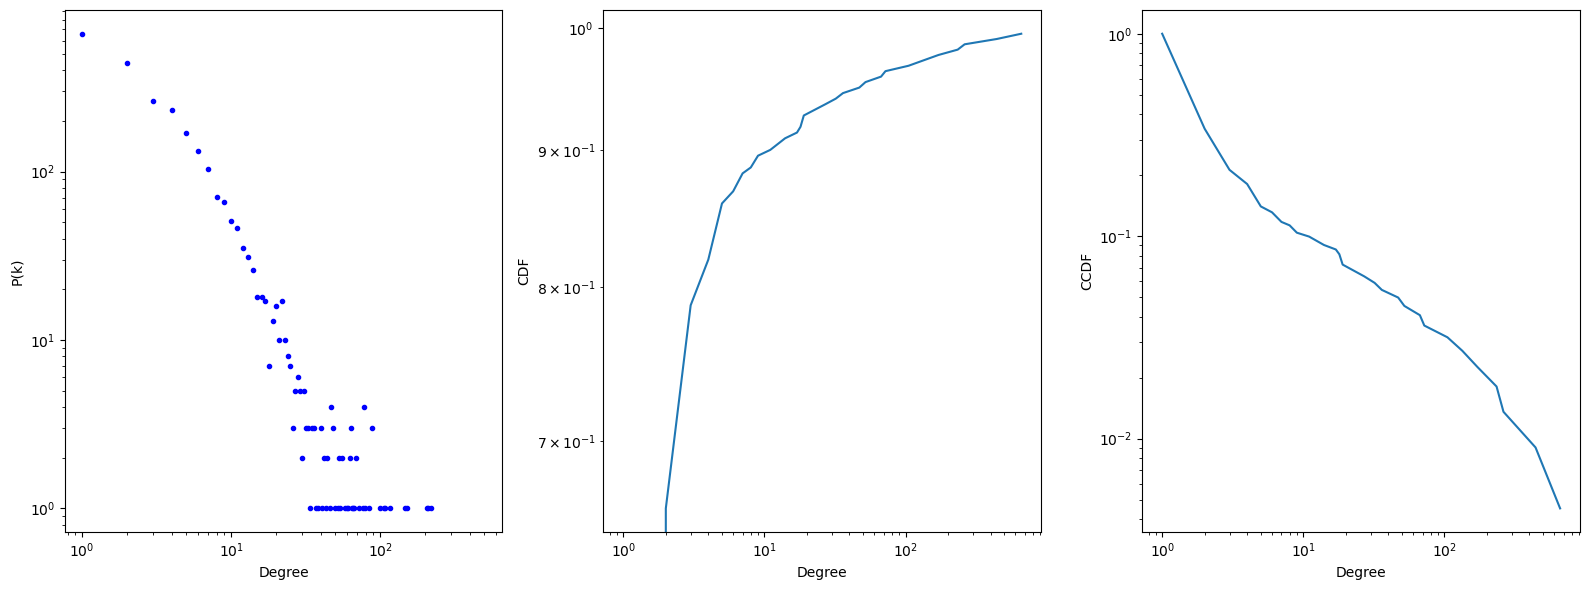

In [25]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import powerlaw

def plot_dist(G):
    M = nx.to_scipy_sparse_array(G)  # Convertimos el grafo a una matriz dispersa de scipy
    xmin = min([d[1] for d in G.degree()])
    indegrees = M.sum(0)  # Suma de los grados de entrada
    degree = np.bincount(indegrees.astype(int))  # Asegúrate de convertir los grados a enteros
    fit = powerlaw.Fit(np.array(degree) + 1, fit_method='KS')

    fig = plt.figure(figsize=(16, 6))

    """ Plot Distribution """
    plt.subplot(1, 3, 1)
    plt.plot(range(len(degree)), degree, 'b.')
    plt.loglog()
    plt.xlim(min(degree), max(degree))
    plt.xlabel('Degree')
    plt.ylabel('P(k)')

    """ Plot CDF """
    plt.subplot(1, 3, 2)
    fit.plot_cdf()
    plt.xlabel('Degree')
    plt.ylabel('CDF')

    """ Plot CCDF """
    plt.subplot(1, 3, 3)
    fit.plot_ccdf()
    plt.xlabel('Degree')
    plt.ylabel('CCDF')

    plt.tight_layout()
    plt.show()

# Ahora puedes llamar a la función con tu grafo g
plot_dist(g)


## Componentes del grafo
``networkx`` permite seleccionar vistas específicas de nodos del gráfico original

In [56]:
list(g.neighbors(1001)) # obtain the list of neighobors for node 0

[4022, 3350, 1058, 836, 3504, 3289, 1131]

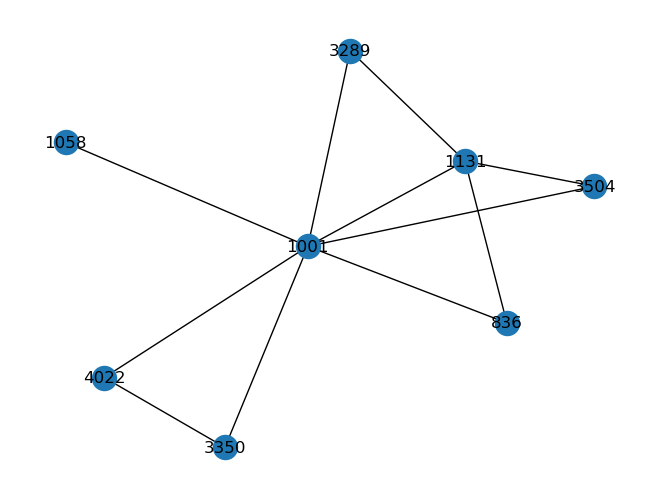

In [63]:
ego = nx.ego_graph(g, 1001) # ego network of the node 0
nx.draw(ego, with_labels=True)

Siguiendo el mismo razonamiento, también pueden extraerse componentes conectados

In [28]:
nx.number_connected_components(g)

85

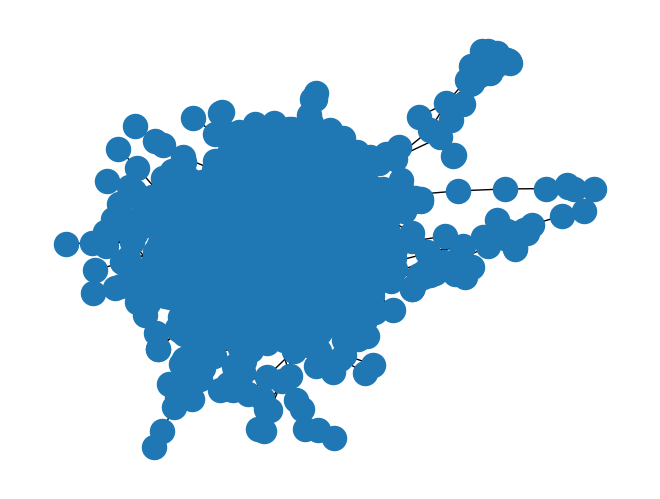

In [70]:
comps = list(nx.connected_components(g)) # get a list of connected components (for decreasing size)
comp_1 = nx.subgraph(g, comps[0]) # build a subgraph on the second component
nx.draw(comp_1)

## Caminos y diámetros
Los caminos más cortos también pueden extraerse utilizando la siguiente sintaxis

In [30]:
nx.shortest_path(g, source=0, target=30)

[0, 306, 30]

In [31]:
nx.shortest_path_length(g, source=0, target=30)

2

Además, el diámetro de la red puede calcularse del siguiente modo

In [32]:
nx.diameter(g.subgraph(comps[0]))

17

## Triángulos, densidad y agrupación
Otros índices que pueden calcularse utilizando la biblioteca son

In [33]:
nx.density(g)

0.002611143776996835

In [74]:
nx.triangles(g)[0]

4

In [72]:
nx.clustering(g)[0]

0.4

In [36]:
nx.average_clustering(g)

0.2006363326458965